Question: How do Spotify audio features differ between hit and non-hit songs, and how have these patterns changed over time?

In [20]:
import pandas as pd

file_path = "/Users/shielawu/Desktop/5243/1950big_data.csv"
df = pd.read_csv(file_path, low_memory=False)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455908 entries, 0 to 455907
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                455908 non-null  int64  
 1   position            4028 non-null    float64
 2   title               455901 non-null  object 
 3   artist              4028 non-null    object 
 4   pos_sentiment       4028 non-null    float64
 5   neg_sentiment       4028 non-null    float64
 6   neut_sentiment      4028 non-null    float64
 7   compound_sentiment  4028 non-null    float64
 8   f_k_grade           4028 non-null    float64
 9   flesch_index        4028 non-null    float64
 10  fog_index           4028 non-null    float64
 11  num_syllables       4028 non-null    float64
 12  difficult_words     4028 non-null    float64
 13  num_dupes           4028 non-null    float64
 14  num_words           4028 non-null    float64
 15  num_lines           4028 non-null 

CLEANING DATA

In [21]:
audio_cols = [
    "danceability","energy","key","loudness","mode",
    "speechiness","acousticness","instrumentalness","liveness",
    "valence","tempo","time_signature"
]

other_numeric = [
    "position","popularity","duration_ms",
    "pos_sentiment","neg_sentiment","neut_sentiment","compound_sentiment",
    "f_k_grade","flesch_index","fog_index",
    "num_syllables","difficult_words","num_dupes","num_words","num_lines"
]

num_cols = [c for c in (audio_cols + other_numeric + ["year","hit","explicit"]) if c in df.columns]

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# hit -> 0/1 int
df["hit"] = df["hit"].astype(int)

df[num_cols].dtypes

danceability          float64
energy                float64
key                   float64
loudness              float64
mode                  float64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature        float64
position              float64
popularity            float64
duration_ms           float64
pos_sentiment         float64
neg_sentiment         float64
neut_sentiment        float64
compound_sentiment    float64
f_k_grade             float64
flesch_index          float64
fog_index             float64
num_syllables         float64
difficult_words       float64
num_dupes             float64
num_words             float64
num_lines             float64
year                    int64
hit                     int64
explicit              float64
dtype: object

In [22]:
na_count = df.isna().sum().sort_values(ascending=False)
na_percent = (na_count / len(df)).sort_values(ascending=False)
missing = pd.concat([na_count, na_percent], axis=1)
missing.columns = ["na_count", "na_percent"]
missing.head(20)

,na_count,na_percent
genre_tags,453236,0.994139
difficult_words,451880,0.991165
f_k_grade,451880,0.991165
num_lines,451880,0.991165
num_words,451880,0.991165
num_dupes,451880,0.991165
num_syllables,451880,0.991165
fog_index,451880,0.991165
flesch_index,451880,0.991165
compound_sentiment,451880,0.991165


In [23]:
print(df[audio_cols ].isna().mean().sort_values(ascending=False))
print(df[other_numeric].isna().mean().sort_values(ascending=False))

danceability        0.005554
energy              0.005554
key                 0.005554
loudness            0.005554
mode                0.005554
speechiness         0.005554
acousticness        0.005554
instrumentalness    0.005554
liveness            0.005554
valence             0.005554
tempo               0.005554
time_signature      0.005554
dtype: float64
position              0.991165
pos_sentiment         0.991165
neg_sentiment         0.991165
neut_sentiment        0.991165
compound_sentiment    0.991165
f_k_grade             0.991165
flesch_index          0.991165
fog_index             0.991165
num_syllables         0.991165
difficult_words       0.991165
num_dupes             0.991165
num_words             0.991165
num_lines             0.991165
popularity            0.005554
duration_ms           0.005554
dtype: float64


In [24]:
thr = 0.95
drop_cols = missing.index[missing["na_percent"] > thr].tolist()

analysis_df = df.drop(columns=drop_cols)
print("analysis_df shape:", analysis_df.shape)
analysis_df.info()

analysis_df shape: (455908, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455908 entries, 0 to 455907
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   year              455908 non-null  int64  
 1   title             455901 non-null  object 
 2   id                453376 non-null  object 
 3   popularity        453376 non-null  float64
 4   duration_ms       453376 non-null  float64
 5   explicit          453376 non-null  float64
 6   artists           453376 non-null  object 
 7   id_artists        453376 non-null  object 
 8   danceability      453376 non-null  float64
 9   energy            453376 non-null  float64
 10  key               453376 non-null  float64
 11  loudness          453376 non-null  float64
 12  mode              453376 non-null  float64
 13  speechiness       453376 non-null  float64
 14  acousticness      453376 non-null  float64
 15  instrumentalness  453376 non-null  f

In [25]:
num_cols = analysis_df.select_dtypes(include="number").columns
for c in num_cols:
     analysis_df[c] = analysis_df[c].fillna(analysis_df[c].median())
analysis_df.isna().sum()

year                   0
title                  7
id                  2532
popularity             0
duration_ms            0
explicit               0
artists             2532
id_artists          2532
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
hit                    0
dtype: int64

In [26]:
df[df["id"].duplicated(keep=False)].sort_values("id")[["id","title","artist","year"]].head(20)  #df[df.duplicated(subset=["title","year"], keep=False)].sort_values(["title","year"]).head(20)

,id,title,artist,year
816,1Gv6f7m5ZNDcInxGA8PsLS,Superstar,Murray Head,1971
817,1Gv6f7m5ZNDcInxGA8PsLS,Superstar,Carpenters,1971
2478,2RChe0r2cMoyOvuKobZy44,Always,Erasure,1994
2492,2RChe0r2cMoyOvuKobZy44,Always,Bon Jovi,1994
3924,2bL2gyO6kBdLkNSkxXNh6x,Animals,Maroon 5,2014
3932,2bL2gyO6kBdLkNSkxXNh6x,Animals,Martin Garrix,2014
2144,4VZDv8sASBS8UruUBGTFdk,Hold On,Wilson Phillips,1990
2151,4VZDv8sASBS8UruUBGTFdk,Hold On,En Vogue,1990
2050,5KG4OVGxSrFmNHGZBezJJn,Don't Be Cruel,Cheap Trick,1988
2059,5KG4OVGxSrFmNHGZBezJJn,Don't Be Cruel,Bobby Brown,1988


In [27]:
df[df["id"]=="1Gv6f7m5ZNDcInxGA8PsLS"]

,year,position,title,artist,pos_sentiment,neg_sentiment,neut_sentiment,compound_sentiment,f_k_grade,flesch_index,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,hit
816,1971,27.0,Superstar,Murray Head,0.090,0.122,0.788,-0.9792,0.9,99.23,...,-11.177,1.0,0.0294,0.728,0.000049,0.138,0.171,83.175,4.0,1
817,1971,30.0,Superstar,Carpenters,0.196,0.047,0.757,0.9853,2.1,90.77,...,-11.177,1.0,0.0294,0.728,0.000049,0.138,0.171,83.175,4.0,1


In [28]:
#df[["key","mode","time_signature"]]

In [29]:
before = len(analysis_df)

analysis_df = analysis_df[analysis_df["id"].notna()].copy()

print("Removed rows with NA id:", before - len(analysis_df))

Removed rows with NA id: 2532


In [30]:
analysis_df["id"].duplicated().sum()

np.int64(5)

In [31]:
check = analysis_df.groupby("id")[audio_cols].nunique()

check.max()

danceability        1
energy              1
key                 1
loudness            1
mode                1
speechiness         1
acousticness        1
instrumentalness    1
liveness            1
valence             1
tempo               1
time_signature      1
dtype: int64

In [32]:
before = len(analysis_df)

analysis_df = analysis_df.drop_duplicates(subset=["id"], keep="first").copy()

print("Removed duplicated ids:", before - len(analysis_df))

Removed duplicated ids: 5


During data integration, duplicate Spotify IDs were identified. Detailed inspection confirmed that duplicated IDs shared identical core audio features, while discrepancies occurred only in externally merged metadata. This indicated a many-to-one join artifact rather than distinct audio records. To preserve dataset integrity, rows without valid Spotify IDs were removed, and duplicate records were eliminated by retaining the first occurrence of each unique ID.

EDA

In [33]:
#Overview
analysis_df.shape

(453371, 21)

In [34]:
analysis_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,453371.0,1988.797665,17.244589,1950.0,1976.0000,1991.000000,2003.00000,2015.000
popularity,453371.0,27.673916,15.999469,0.0,15.0000,27.000000,39.00000,90.000
duration_ms,453371.0,233031.499882,125883.026716,6373.0,176267.0000,220053.000000,268905.00000,5621218.000
explicit,453371.0,0.027053,0.162238,0.0,0.0000,0.000000,0.00000,1.000
danceability,453371.0,0.557618,0.163359,0.0,0.4490,0.571000,0.67700,0.991
energy,453371.0,0.548327,0.248307,0.0,0.3580,0.553000,0.75200,1.000
key,453371.0,5.213262,3.512974,0.0,2.0000,5.000000,8.00000,11.000
loudness,453371.0,-10.286909,4.938386,-60.0,-12.9260,-9.455000,-6.68000,5.376
mode,453371.0,0.666309,0.471531,0.0,0.0000,1.000000,1.00000,1.000
speechiness,453371.0,0.101541,0.181875,0.0,0.0332,0.042500,0.06930,0.971


In [35]:
analysis_df[analysis_df["tempo"] == 0].shape

(160, 21)

The cleaned dataset contains 453,371 unique Spotify ids from 1950 to 2015, each represented by core audio features and a binary indicator of Billboard hit status. Most audio variables fall within expected Spotify-defined ranges, with average danceability (0.56) and energy (0.55) indicating moderately rhythmic and energetic tracks overall. Loudness averages −10.29 dB, and the mean tempo is approximately 119 BPM, both consistent with mainstream popular music characteristics.

The majority of songs are in major mode (about 66%) and predominantly use a 4/4 time signature, suggesting limited variation in basic harmonic and rhythmic structure. Instrumentalness has a median near zero, indicating that most tracks contain vocals.

Notably, only about 0.33% of tracks are labeled as Billboard hits, revealing a highly imbalanced dataset. This imbalance is an important structural feature to consider in subsequent comparative analysis between hit and non-hit songs.

In [36]:
#Hit vs Non-hit
analysis_df.groupby("hit")[audio_cols].mean().T

hit,0,1
danceability,0.557431,0.614155
energy,0.548097,0.618007
key,5.213054,5.276325
loudness,-10.292477,-8.599577
mode,0.666177,0.706237
speechiness,0.101655,0.066729
acousticness,0.438745,0.275604
instrumentalness,0.095620,0.033170
liveness,0.217533,0.173388
valence,0.562470,0.607490


From the table, we can get hit songs tend to be more danceable, energetic, and louder than non-hit songs, while showing lower levels of acousticness and instrumentalness. In contrast, tonal attributes such as key and time signature exhibit minimal differences, suggesting that production intensity and rhythmic engagement play a stronger role in commercial success than basic harmonic structure.

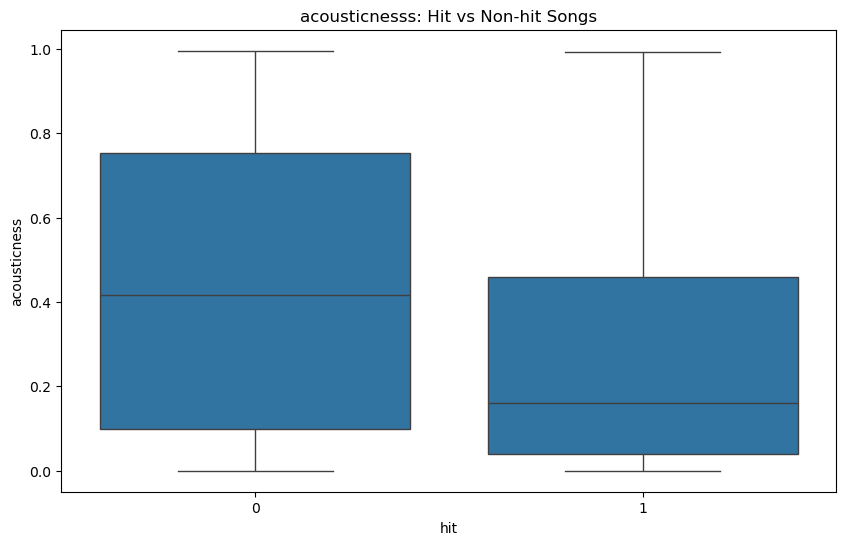

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(
    data=analysis_df,
    x="hit",
    y="acousticness"
)
plt.title("acousticnesss: Hit vs Non-hit Songs")
plt.show()

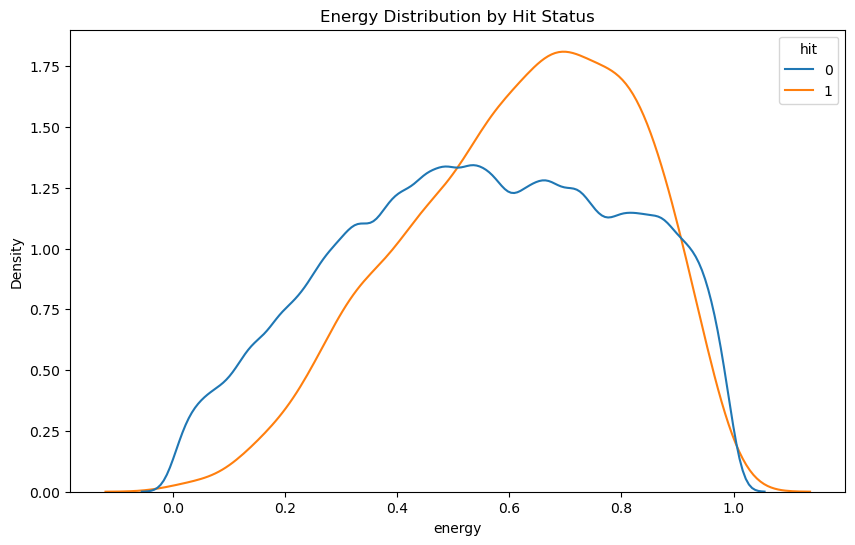

In [38]:
plt.figure(figsize=(10,6))
sns.kdeplot(
    data=analysis_df,
    x="energy",
    hue="hit",
    common_norm=False
)
plt.title("Energy Distribution by Hit Status")
plt.show()

The distribution of energy is clearly shifted to the right for hit songs, indicating that commercially successful tracks tend to have consistently higher energy levels. Low-energy songs are substantially underrepresented among Billboard hits.

EDA: Correlation

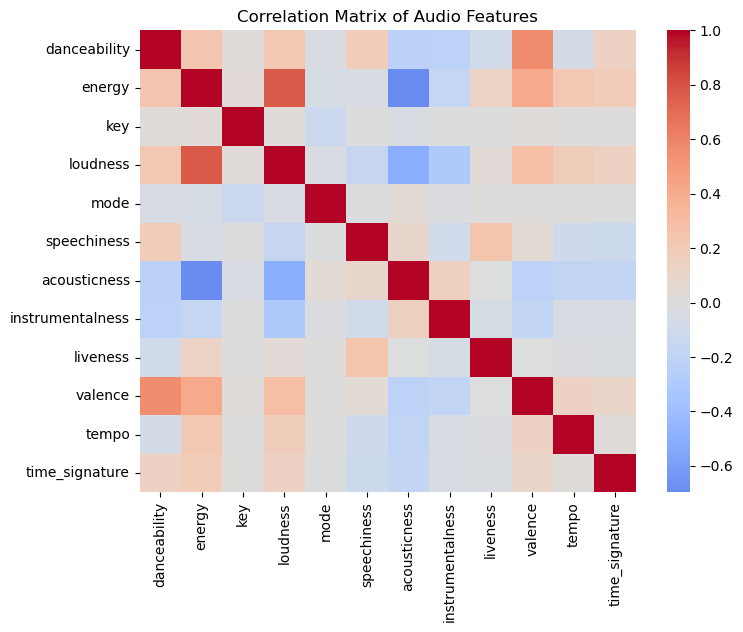

In [39]:
corr = analysis_df[audio_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Audio Features")
plt.show()

The correlation matrix reveals strong relationships among several production-related features. Energy is strongly positively correlated with loudness, while acousticness is negatively correlated with both energy and loudness, indicating that acoustic tracks tend to be softer and less intense. Danceability and valence also show a positive association, suggesting that rhythmically engaging songs are often perceived as more positive in mood.

EDA: Pattern Overtime

In [40]:
analysis_df["decade"] = (analysis_df["year"] // 10) * 10
hit_trend = (
    analysis_df[analysis_df["hit"] == 1]
    .groupby("decade")[audio_cols]
    .mean()
)

hit_trend.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
decade,,,,,,,,,,,,
1950,0.503960,0.392364,4.480000,-11.315580,0.960000,0.050714,0.793500,0.117744,0.171740,0.584004,119.374320,3.720000
1960,0.561313,0.502659,5.110132,-10.511366,0.792952,0.043337,0.490458,0.059466,0.180860,0.673705,118.013304,3.854626
1970,0.562582,0.558115,5.282869,-10.635311,0.729084,0.048061,0.370574,0.043859,0.179683,0.630477,119.587016,3.936255
1980,0.642715,0.637111,5.342105,-10.366035,0.732456,0.041774,0.220918,0.023361,0.149024,0.655405,119.420425,4.004386
1990,0.640882,0.637938,5.672986,-8.656322,0.682464,0.070357,0.173321,0.022244,0.179287,0.574230,114.568185,3.957346


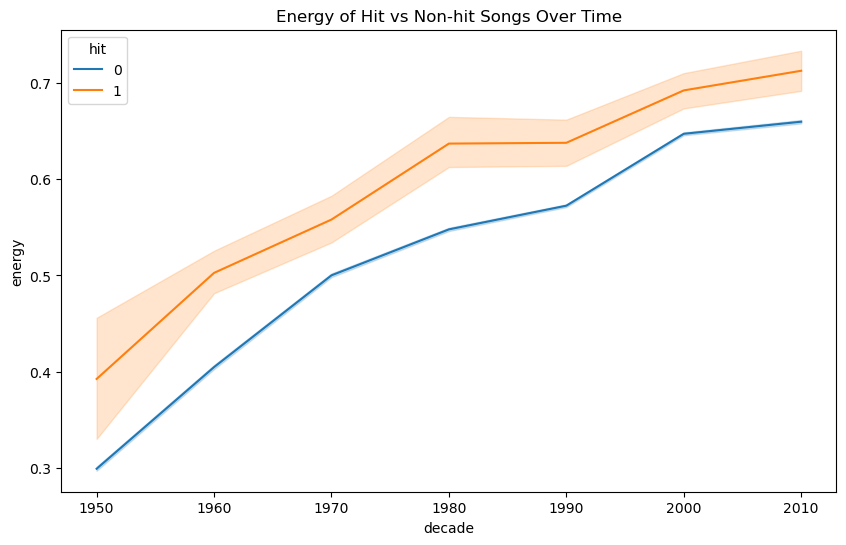

In [41]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data= analysis_df,
    x="decade",
    y="energy",
    hue="hit",
    estimator="mean"
)
plt.title("Energy of Hit vs Non-hit Songs Over Time")
plt.show()

Energy levels have steadily increased over time for both hit and non-hit songs, reflecting broader shifts in music production and stylistic preferences. Across all decades, hit songs consistently exhibit higher energy than non-hit songs, suggesting that elevated intensity is a persistent characteristic of commercially successful tracks.

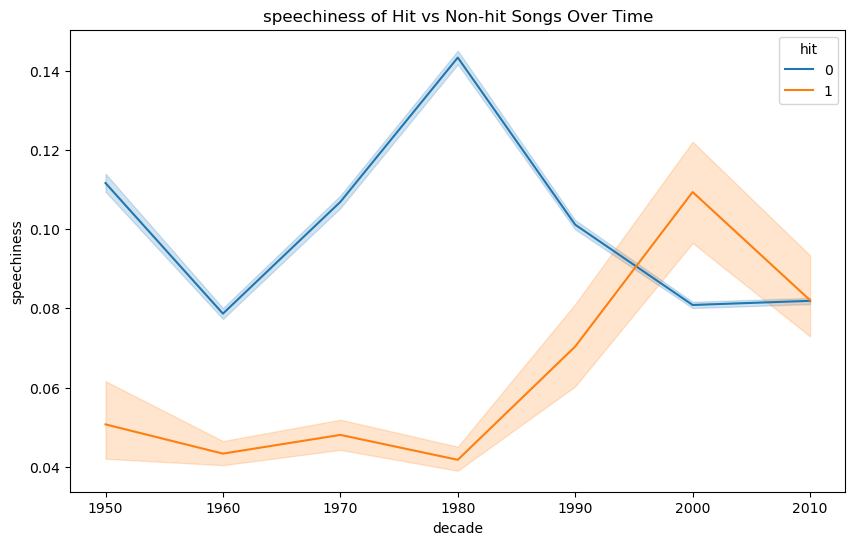

In [42]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data= analysis_df,
    x="decade",
    y="speechiness",
    hue="hit",
    estimator="mean"
)
plt.title("speechiness of Hit vs Non-hit Songs Over Time")
plt.show()

Speechiness exhibits a different temporal pattern. While early decades show consistently lower speechiness among hit songs, the gap narrows significantly after the 1990s, reflecting the rise of rap and spoken-style music in mainstream charts. This suggests that stylistic preferences associated with commercial success have evolved over time.